<a href="https://colab.research.google.com/github/Loverzzz/E-commerceSales/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_ReynaldoABT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')  # Ganti dengan path file Anda
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Mengambil baris secara acak
data_sampled = data.sample(n=5000, random_state=42)
print(data_sampled.head())

       InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
209268    6/1/2011 12:05       0.85     17315.0  United Kingdom  
207108   5/27/2011 17:14       6.95     14031.0  United Kingdom  
167085   4/21/2011 17:05       0.65     14031.0  United Kingdom  
471836  11/16/2011 10:39       1.95     17198.0  United Kingdom  
115865    3/10/2011 8:40       9.95     13502.0  United Kingdom  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", data_sampled.shape)
print("Jenis data di setiap kolom:\n", data_sampled.dtypes)

Jumlah baris dan kolom: (5000, 8)
Jenis data di setiap kolom:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
# Menangani Data yang Hilang
missing_values = data_sampled.isnull().sum()
print("Data yang hilang:\n", missing_values[missing_values > 0])

# Contoh penanganan missing values
# data.fillna(data.mean(), inplace=True)  # Mengisi dengan rata-rata untuk kolom numerikal
data_sampled.dropna(inplace=True) # Atau hapus baris dengan missing values

Data yang hilang:
 Description      14
CustomerID     1266
dtype: int64


In [ ]:
# Memeriksa kembali data yang hilang
missing_values = data_sampled.isnull().sum()
print("Data yang hilang setelah penanganan:\n", missing_values[missing_values > 0])

Data yang hilang setelah penanganan:
 Series([], dtype: int64)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menghapus atau Menangani Data Kosong (Missing Values)
data_sampled.dropna(inplace=True)

# Menghapus Data Duplikat
data_sampled.drop_duplicates(inplace=True)

In [ ]:
# Menghapus Outlier pada UnitPrice
Q1 = data_sampled['UnitPrice'].quantile(0.25)
Q3 = data_sampled['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_sampled = data_sampled[(data_sampled['UnitPrice'] >= lower_bound) & (data_sampled['UnitPrice'] <= upper_bound)]

# Menghapus Outlier pada Quantity
Q1 = data_sampled['Quantity'].quantile(0.25)
Q3 = data_sampled['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_sampled = data_sampled[(data_sampled['Quantity'] >= lower_bound) & (data_sampled['Quantity'] <= upper_bound)]

# Menghapus nilai negatif pada Quantity
data_sampled = data_sampled[data_sampled['Quantity'] >= 0]

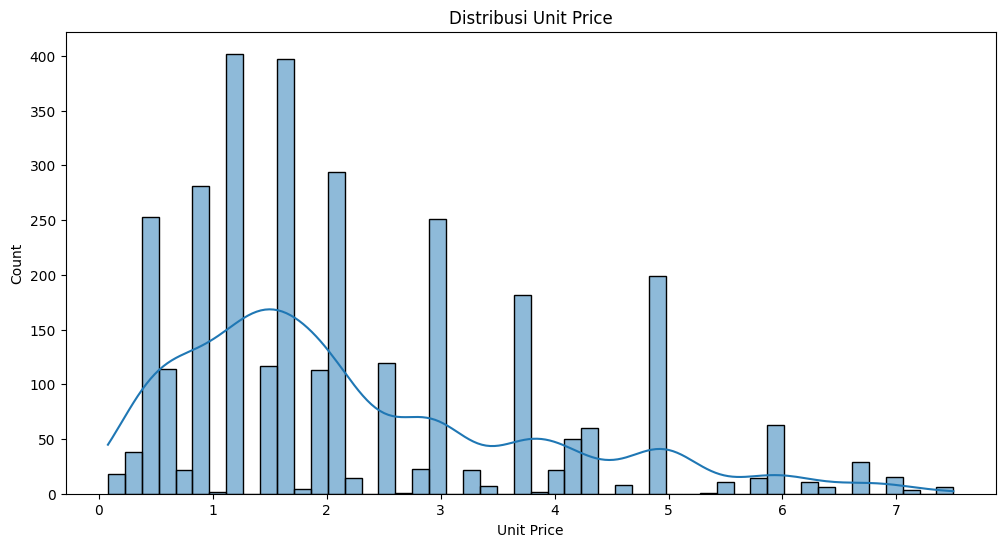

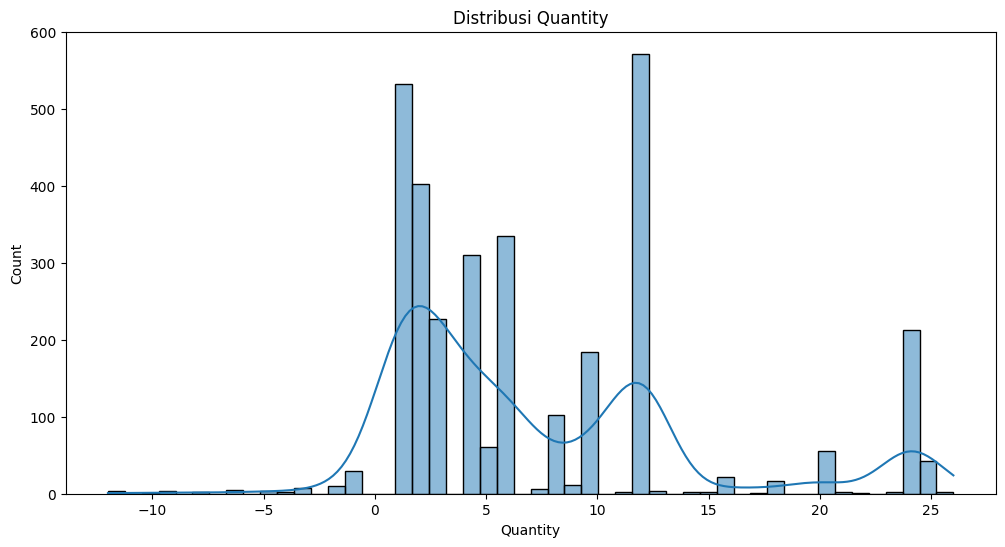

In [ ]:
# Visualisasi Distribusi UnitPrice
plt.figure(figsize=(12, 6))
sns.histplot(data_sampled['UnitPrice'], bins=50, kde=True)
plt.title('Distribusi Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

# Visualisasi Distribusi Quantity
plt.figure(figsize=(12, 6))
sns.histplot(data_sampled['Quantity'], bins=50, kde=True)
plt.title('Distribusi Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()


In [ ]:
# Normalisasi Data Numerikal
scaler = StandardScaler()
data_sampled[['Quantity', 'UnitPrice']] = scaler.fit_transform(data_sampled[['Quantity', 'UnitPrice']])

# Encoding Data Kategorikal (Country)
data_encoded = pd.get_dummies(data_sampled, columns=['Country'], drop_first=True)

# Menentukan Fitur Clustering
features = ['UnitPrice'] + [col for col in data_encoded.columns if 'Country_' in col]
print("Fitur yang digunakan untuk clustering:", features)


Fitur yang digunakan untuk clustering: ['UnitPrice', 'Country_Austria', 'Country_Belgium', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Iceland', 'Country_Italy', 'Country_Japan', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom']


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Membuat Model DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=3)
data_encoded['Cluster'] = dbscan.fit_predict(data_encoded[features])

# Menampilkan Hasil Clustering
print("Jumlah data di setiap cluster:")
print(data_encoded['Cluster'].value_counts())

Jumlah data di setiap cluster:
Cluster
 0     185
 2     178
 1     177
 5     168
-1     101
 4      93
 19     47
 16     30
 6      28
 3      20
 8      18
 20     15
 11     10
 22     10
 15      9
 35      8
 13      8
 18      8
 24      7
 29      6
 7       6
 25      5
 23      5
 12      5
 33      5
 32      4
 17      4
 36      4
 10      4
 14      4
 31      4
 27      4
 9       3
 21      3
 26      3
 30      3
 28      3
 34      3
 37      3
 38      3
 39      3
 40      3
 41      3
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Evaluasi Model Clustering
# Menghitung Silhouette Score Tanpa Outlier
filtered_data = data_encoded[data_encoded['Cluster'] != -1]  # Menghapus outlier
filtered_features = filtered_data[features]
filtered_labels = filtered_data['Cluster']

if len(filtered_labels) > 1:
    silhouette_avg = silhouette_score(filtered_features, filtered_labels)
    print(f"Silhouette Score (tanpa outlier): {silhouette_avg:.3f}")
else:
    print("Jumlah cluster tidak mencukupi untuk menghitung Silhouette Score.")

Silhouette Score (tanpa outlier): 0.903


In [ ]:
#Gridsearch untuk optimasi
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_eps = 0
best_min_samples = 0
best_score = -1

# Loop untuk uji parameter eps dan min_samples
for eps in np.arange(0.1, 2.0, 0.1):  # Range eps dari 0.1 sampai 2.0
    for min_samples in range(3, 10):  # Range min_samples dari 3 sampai 10
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_encoded[features])

        # Periksa jumlah cluster unik (tidak termasuk outlier)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:  # Minimal 2 cluster untuk Silhouette Score
            filtered_data = data_encoded[labels != -1]  # Hapus outlier
            filtered_labels = labels[labels != -1]

            score = silhouette_score(filtered_data[features], filtered_labels)

            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Parameter Optimal: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_score:.3f}")


Parameter Optimal: eps=0.1, min_samples=3, Silhouette Score=0.903


## **c. Feature Selection (Opsional)** tidak menggunakan ini

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

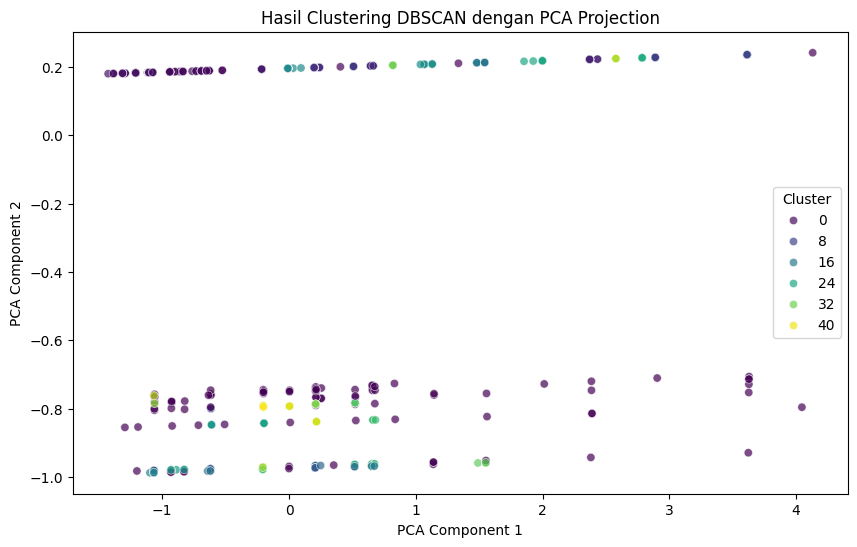

In [ ]:
#Visualisasi Hasil Clustering dengan PCA
# Reduksi Dimensi Menggunakan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_encoded[features])
data_encoded['PCA1'] = pca_result[:, 0]
data_encoded['PCA2'] = pca_result[:, 1]

# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Hasil Clustering DBSCAN dengan PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis Karakteristik Tiap Cluster
for cluster in sorted(data_encoded['Cluster'].unique()):
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = data_encoded[data_encoded['Cluster'] == cluster]
    print("Jumlah Data:", len(cluster_data))
    print(cluster_data.describe())  # Statistik Deskriptif

    # Distribusi negara
    print("Distribusi Negara:")
    print(cluster_data[[col for col in data_encoded.columns if 'Country_' in col]].sum())


--- Cluster -1 ---
Jumlah Data: 101
         Quantity   UnitPrice    CustomerID  Cluster        PCA1        PCA2
count  101.000000  101.000000    101.000000    101.0  101.000000  101.000000
mean     0.083416    0.408642  13243.445545     -1.0    0.419360   -0.745674
std      1.021152    1.357529   1178.356003      0.0    1.357400    0.231362
min     -1.161426   -1.310750  12347.000000     -1.0   -1.294308   -0.985422
25%     -0.445021   -0.627666  12446.000000     -1.0   -0.618439   -0.804406
50%     -0.445021    0.200314  12684.000000     -1.0    0.210986   -0.760288
75%      0.987788    0.821300  14016.000000     -1.0    0.831714   -0.744830
max      1.883294    4.133222  17444.000000     -1.0    4.130437    0.241062
Distribusi Negara:
Country_Austria                  3
Country_Belgium                  3
Country_Canada                   1
Country_Channel Islands          4
Country_Cyprus                   2
Country_Denmark                  4
Country_EIRE                    12
Countr

Tulis hasil interpretasinya di sini.

1. Distribusi Negara:

    Mayoritas klaster terdiri dari United Kingdom, namun ada negara lain seperti Germany, France, EIRE (Ireland), Spain, dan Belgium.
    Beberapa klaster kecil hanya memiliki kontribusi dari negara tertentu.

2. Quantity dan UnitPrice:

    Klaster dengan UnitPrice tertinggi:
    Cluster 7 (2.89) dan Cluster 8 (3.61).
    Klaster dengan UnitPrice terendah:
    Cluster 12 (-1.07), Cluster 1 (-1.11).

Pola :
    Klaster kecil seperti Cluster 9, 10, 22 fokus pada negara tertentu.
    UnitPrice positif seringkali terkait dengan cluster yang memiliki distribusi data lebih kecil.

    
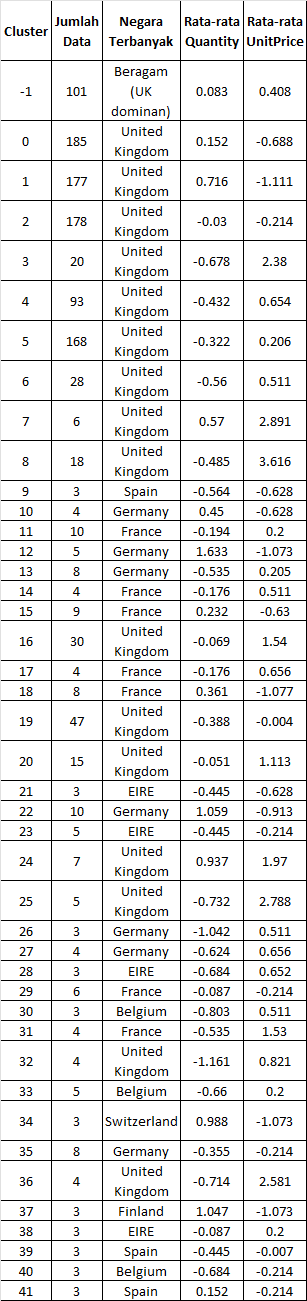

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengeksport Data
data_sampled.to_csv('/content/drive/MyDrive/E-CommerceSales/clustered_data.csv', index=False)